In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('Housing.csv')


In [3]:
# Display the first few rows of the dataset
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Get summary statistics
data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
# Check for missing values
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [9]:
# Fill missing numerical values with the median
#data.fillna(data.median(), inplace=True)

# Fill missing categorical values with the mode
#data.fillna(data.mode().iloc[0], inplace=True)


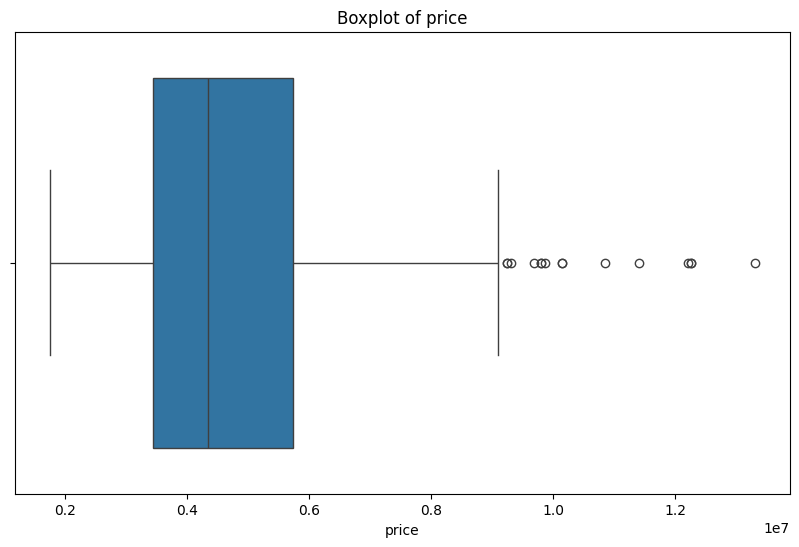

In [13]:
# Plotting boxplots to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['price'])
plt.title('Boxplot of price')
plt.show()

# Remove outliers in SalePrice
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1
data = data[~((data['price'] < (Q1 - 1.5 * IQR)) | (data['price'] > (Q3 + 1.5 * IQR)))]


In [19]:
# Convert binary categorical variables to numeric
binary_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
data[binary_cols] = (data[binary_cols] == 'yes').astype(int)


C:\Users\Admin\AppData\Local\Temp\ipykernel_20160\1106387701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[binary_cols] = (data[binary_cols] == 'yes').astype(int)


In [21]:
#One-hot encoding for 'furnishingstatus'
data = pd.get_dummies(data, columns=['furnishingstatus'])

In [25]:
# Feature scaling for numerical variables
#num_cols = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
#scaler = StandardScaler()
#data[num_cols] = scaler.fit_transform(data[num_cols])

In [ ]:
# Create additional features
#data['TotalArea'] = data['area'] + data['1stFlrSF'] + data['2ndFlrSF']
#data['TotalRooms'] = data['bedrooms'] + data['guestroom']


# Step 5: Reorder columns to place 'price' as the last column (target variable)
#target_variable = 'price'
#columns_order = [col for col in data.columns if col != target_variable] + [target_variable]
#data = data[columns_order]

# Display the processed data
#print(data.head())